# Task 3. Algorithms for unconstrained nonlinear optimization. First- and second-order methods

### Goal
The use of first- and second-order methods (Gradient Descent, Non-linear
Conjugate Gradient Descent, Newton’s method and Levenberg-Marquardt
algorithm) in the tasks of unconstrained nonlinear optimization

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import optimize

In [40]:
# Generate random numbers 𝛼 ∈ (0,1) and 𝛽 ∈ (0,1)
alpha = np.random.uniform(0, 1)
beta = np.random.uniform(0, 1)

# Noisy data generation
xk = np.array([k / 100 for k in range(101)])
yk = np.array([alpha * k + beta + np.random.normal(0.5, 0.125) for k in xk])

Gradient descent method of optimization

In [41]:
# create gradient descent function
def gradient_descent(xk, yk, w, b, lr, func_type):
    # initialize variable
    d1dw = 0.0
    d1db = 0.0
    N= xk.shape[0]
    
    # loss linear = (wx + b - y) ** 2
    # loss rational = (b / (1 + wx) - y) ** 2
    for xi, yi in zip(xk, yk):
        # gradient step
        if func_type == 'linear':
            d1dw += 2 * (w * xi + b - yi) * xi
            d1db += 2 * (w * xi + b - yi)
        else:
            d1dw += 2 * (w / (1 + b * xi) - yi) / (1 + b * xi)
            d1db += 2 * (w / (1 + b * xi) - yi) * (- xi * w / (1 + b * xi) ** 2)
    
    # make an updates to the parameters
    w = w - lr * (1 / N) * d1dw
    b = b - lr * (1 / N) * d1db
    return w, b

In [42]:
# train function
def train(xk, yk, num_epoch, lr, func_type):  
    w, b = 0.0, 0.0
    for epoch in range(num_epoch):
        # run gradient descent
        w, b = gradient_descent(xk, yk, w, b, lr, func_type)
        yhat = w * xk + b if func_type == 'linear' else w / (1 + b * xk)
        loss = np.divide(np.sum((yhat - yk) ** 2, axis=0), xk.shape[0])
        if epoch % 10 == 0:
            print(f'epoch: {epoch}, loss: {round(loss, 4)}, true: {round(alpha, 4), round(beta, 4)}, curr: {round(w, 4), round(b, 4)}')
    return w, b

Start training for linear
epoch: 0, loss: 0.8569, true: (0.7066, 0.0527), curr: (0.0103, 0.0184)
epoch: 10, loss: 0.5223, true: (0.7066, 0.0527), curr: (0.1009, 0.178)
epoch: 20, loss: 0.3221, true: (0.7066, 0.0527), curr: (0.1718, 0.3011)
epoch: 30, loss: 0.2023, true: (0.7066, 0.0527), curr: (0.2274, 0.3959)
epoch: 40, loss: 0.1305, true: (0.7066, 0.0527), curr: (0.2713, 0.4687)
epoch: 50, loss: 0.0875, true: (0.7066, 0.0527), curr: (0.306, 0.5246)
epoch: 60, loss: 0.0617, true: (0.7066, 0.0527), curr: (0.3336, 0.5675)
epoch: 70, loss: 0.0462, true: (0.7066, 0.0527), curr: (0.3557, 0.6002)
epoch: 80, loss: 0.0369, true: (0.7066, 0.0527), curr: (0.3736, 0.6251)
epoch: 90, loss: 0.0312, true: (0.7066, 0.0527), curr: (0.3882, 0.644)
epoch: 100, loss: 0.0278, true: (0.7066, 0.0527), curr: (0.4002, 0.6581)
epoch: 110, loss: 0.0257, true: (0.7066, 0.0527), curr: (0.4102, 0.6687)
epoch: 120, loss: 0.0244, true: (0.7066, 0.0527), curr: (0.4187, 0.6765)
epoch: 130, loss: 0.0235, true: (0.7066

epoch: 940, loss: 0.0179, true: (0.7066, 0.0527), curr: (0.6014, 0.6208)
epoch: 950, loss: 0.0179, true: (0.7066, 0.0527), curr: (0.6025, 0.6202)
epoch: 960, loss: 0.0179, true: (0.7066, 0.0527), curr: (0.6036, 0.6196)
epoch: 970, loss: 0.0179, true: (0.7066, 0.0527), curr: (0.6047, 0.619)
epoch: 980, loss: 0.0179, true: (0.7066, 0.0527), curr: (0.6057, 0.6184)
epoch: 990, loss: 0.0179, true: (0.7066, 0.0527), curr: (0.6068, 0.6179)
epoch: 1000, loss: 0.0178, true: (0.7066, 0.0527), curr: (0.6078, 0.6173)
epoch: 1010, loss: 0.0178, true: (0.7066, 0.0527), curr: (0.6088, 0.6168)
epoch: 1020, loss: 0.0178, true: (0.7066, 0.0527), curr: (0.6098, 0.6163)
epoch: 1030, loss: 0.0178, true: (0.7066, 0.0527), curr: (0.6108, 0.6157)
epoch: 1040, loss: 0.0178, true: (0.7066, 0.0527), curr: (0.6118, 0.6152)
epoch: 1050, loss: 0.0178, true: (0.7066, 0.0527), curr: (0.6127, 0.6147)
epoch: 1060, loss: 0.0178, true: (0.7066, 0.0527), curr: (0.6137, 0.6142)
epoch: 1070, loss: 0.0178, true: (0.7066, 0.0

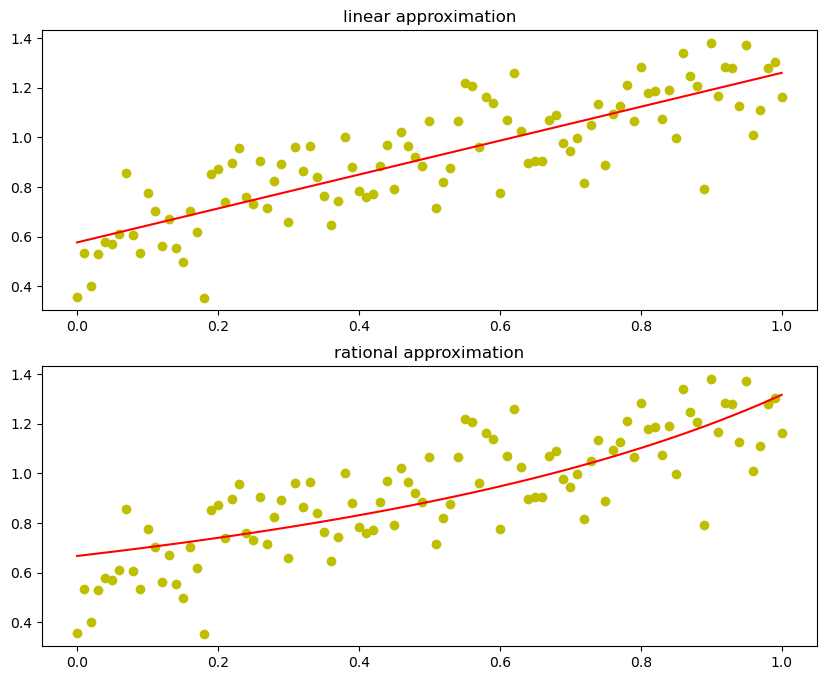

In [43]:
num_epochs = 5000
lr = 0.01
eps = 0.001
func_types = ['linear', 'rational']

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, func in enumerate(func_types):
    print(f'Start training for {func}')
    w, b = train(xk, yk, num_epochs, lr, func)
    
    axs[i].scatter(xk, yk, c='y')
    if func == 'linear':
        GD_linear = [w, b]
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        GD_rat = [w, b]
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print()

Conjugate Gradient descent method of optimization

In [44]:
# create approximation functions
def linear(wb):
    w, b = wb
    return np.sum((w * xk + b - yk) ** 2, axis=0)

def rational(wb):
    w, b = wb
    return np.sum((w / (1 + b * xk) - yk) ** 2, axis=0)

Start training for <function linear at 0x00000286E66C9080>
Optimization terminated successfully.
         Current function value: 1.751892
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
Founded values: (0.683812837880497, 0.5765984367862103), real values: (0.7065679148496843, 0.052749473169785066)
 
Start training for <function rational at 0x00000286E66C8F40>
Optimization terminated successfully.
         Current function value: 2.018796
         Iterations: 13
         Function evaluations: 88
         Gradient evaluations: 29
Founded values: (0.6673087157945847, -0.49319452306477374), real values: (0.7065679148496843, 0.052749473169785066)
 


C:\Users\ACER\AppData\Local\Temp\ipykernel_13556\111573855.py:9: OptimizeWarning: Unknown solver options: xtol
  CGD = minimize(func, start, method='CG', options={'xtol':1e-3, 'disp':True})


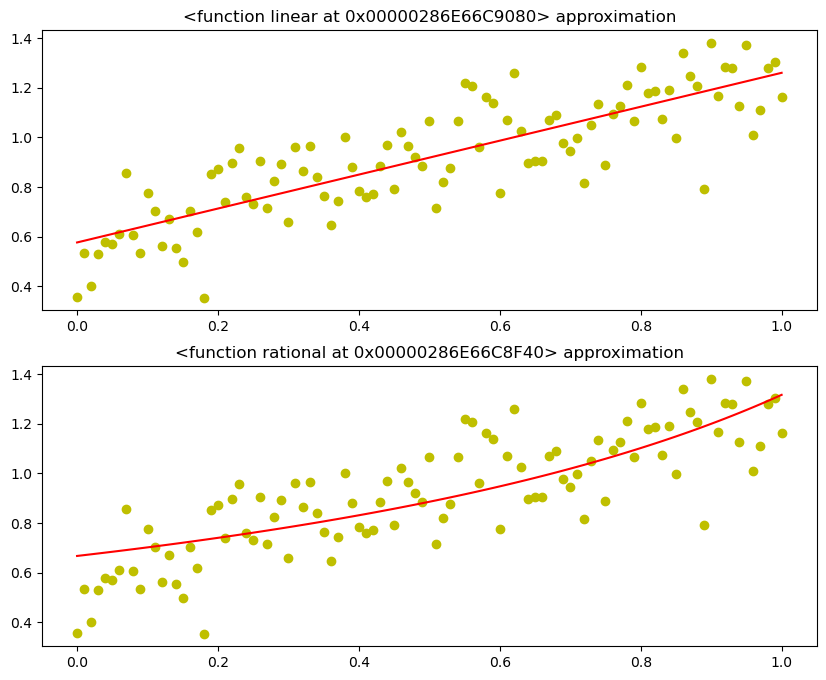

In [45]:
# types of approximation fuctions
func_types = [linear, rational]
start_values = [[1., 1.], [1., -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, start) in enumerate(zip(func_types, start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method 
    CGD = minimize(func, start, method='CG', options={'xtol':1e-3, 'disp':True})
    w, b = CGD.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        CGD_linear = CGD.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        CGD_rat = CGD.x
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Newton’s method of optimization

In [46]:
# create approximation functions
# for linear
def linear(wb):
    w, b = wb
    return np.sum((w * xk + b - yk) ** 2, axis=0)

def d_linear(wb):
    w, b = wb
    return np.array([np.sum(2 * xk * (b + w * xk - yk)), np.sum(2 * (b + w * xk - yk))])

def hess_lin(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 * xk**2)
    hess[0,1] = np.sum(2 * xk)
    hess[1,0] = np.sum(2 * xk)
    hess[1,1] = (2)
    return hess

# for rational
def rational(wb):
    w, b = wb
    return np.sum((w / (1 + b * xk) - yk) ** 2, axis=0)

def d_rational(wb):
    w, b = wb
    return np.array([np.sum((w/(1+b*xk) - yk)*2/(1+b*xk)), np.sum(2*w*xk/(1+b*xk)**2 * (w/(1+b*xk)-yk))])

def hess_rat(wb):
    w, b = wb
    hess = np.ones([2,2])
    hess[0,0] = np.sum(2 / (1+b*xk)**2)
    hess[0,1] = np.sum(-2*w*xk/(1+b*xk)**3-2*xk*(w/(1+b*xk)-yk) / (1+b*xk)**3)
    hess[1,0] = np.sum(-2*w*xk/(1+b*xk)**3-2*xk*(w/(1+b*xk)-yk) / (1+b*xk)**3)
    hess[1,1] = np.sum(2 * w**2 * xk**2 / (1+b*xk)**4 * 4 * w * xk**2 * (w/(1+b*xk)-yk) / (1+b*xk)**3)
    return hess

Start training for <function linear at 0x00000286E2C739C0>
Optimization terminated successfully.
         Current function value: 1.751899
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8
         Hessian evaluations: 5
Founded values: (0.6847167707695075, 0.576070939800359), real values: (0.7065679148496843, 0.052749473169785066)
 
Start training for <function rational at 0x00000286E6A8B600>
         Current function value: 2.361864
         Iterations: 5
         Function evaluations: 31
         Gradient evaluations: 19
         Hessian evaluations: 6
Founded values: (0.6262624374605036, -0.5766608976744547), real values: (0.7065679148496843, 0.052749473169785066)
 


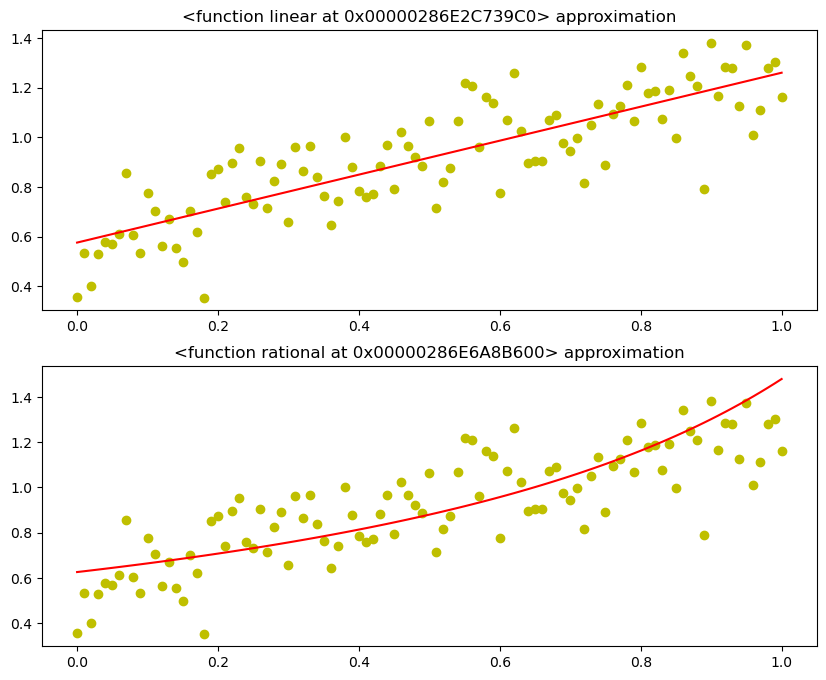

In [47]:
# types of approximation fuctions
func_types = [linear, rational]
jac_types = [d_linear, d_rational]
hess_types = [hess_lin, hess_rat]
start_values = [[1.0, 1.0], [1.1, -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, jac, hess, start) in enumerate(zip(func_types, 
                                          jac_types, 
                                          hess_types,
                                          start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method
    newton = minimize(func, start, method='Newton-CG', jac=jac, hess=hess, options={'xtol': 1e-3, 'disp':True})
    w, b = newton.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        Newton_linear = newton.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        Newton_rat = newton.x
        axs[i].plot(xk, w / (1 + b * xk), 'r')
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Levenberg-Marquardt method of optimization

In [48]:
# create approximation functions
# for linear
def linear(wb):
    w, b = wb
    return (w * xk + b - yk) ** 2

# for rational
def rational(wb):
    w, b = wb
    return (w / (1 + b * xk) - yk) ** 2

Start training for <function linear at 0x00000286E6749E40>
Founded values: (0.6485167582728685, 0.5828836790214166), real values: (0.7065679148496843, 0.052749473169785066)
 
Start training for <function rational at 0x00000286E6749BC0>
Founded values: (0.6633517329769831, -0.48361938529977916), real values: (0.7065679148496843, 0.052749473169785066)
 


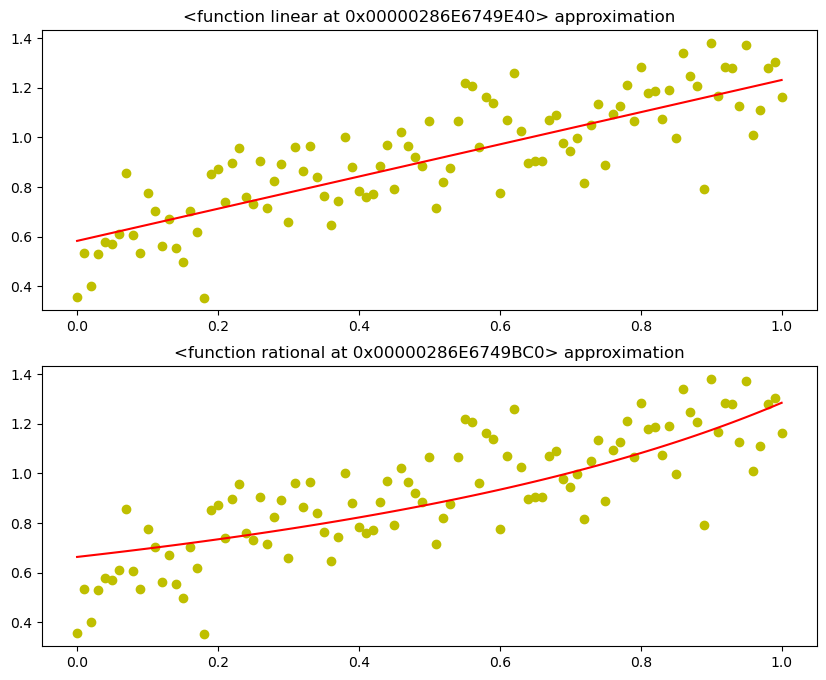

In [49]:
# types of approximation fuctions
func_types = [linear, rational]
start_values = [[1., 1.], [1., -0.5]]

fig, axs = plt.subplots(2, 1, figsize = (10, 8))
for i, (func, start) in enumerate(zip(func_types, start_values)):
    print(f'Start training for {func}')
    # Run Conjugate gradient descent method 
    lma = optimize.least_squares(func, start, method="lm", xtol=1e-3)
    w, b = lma.x
    
    # plot graphs
    axs[i].scatter(xk, yk, c='y')
    if func == linear:
        lma_linear = lma.x
        axs[i].plot(xk, w * xk + b, 'r')
    else:
        lma_rat = lma.x
        axs[i].plot(xk, w / (1 + b * xk), 'r') 
    axs[i].set_title(f'{func} approximation')
    print(f'Founded values: {w, b}, real values: {alpha, beta}')
    print(' ')

Plot all linear results

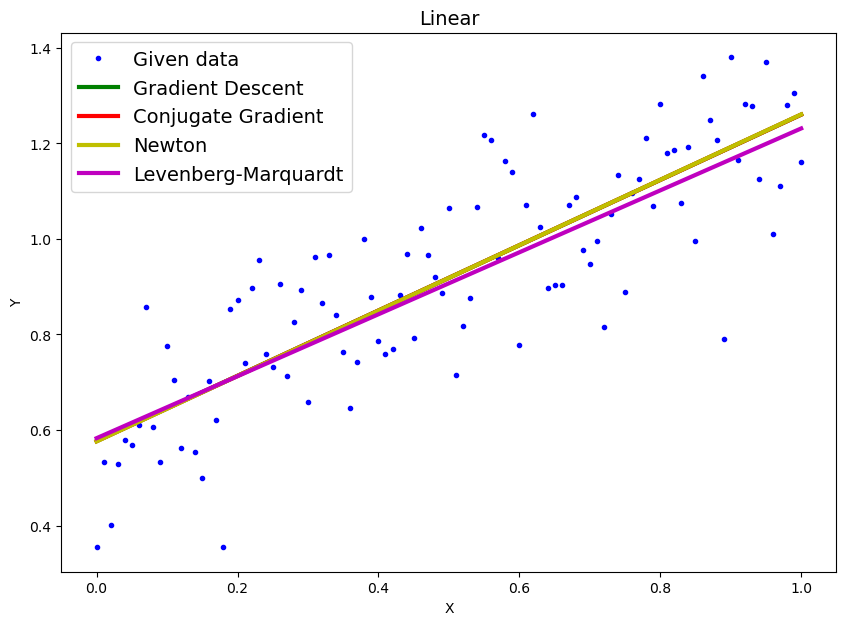

In [50]:
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, GD_linear[0]*xk + GD_linear[1], 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_linear[0]*xk + CGD_linear[1], 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_linear[0]*xk + Newton_linear[1], 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_linear[0]*xk + lma_linear[1], 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

Plot all rational results

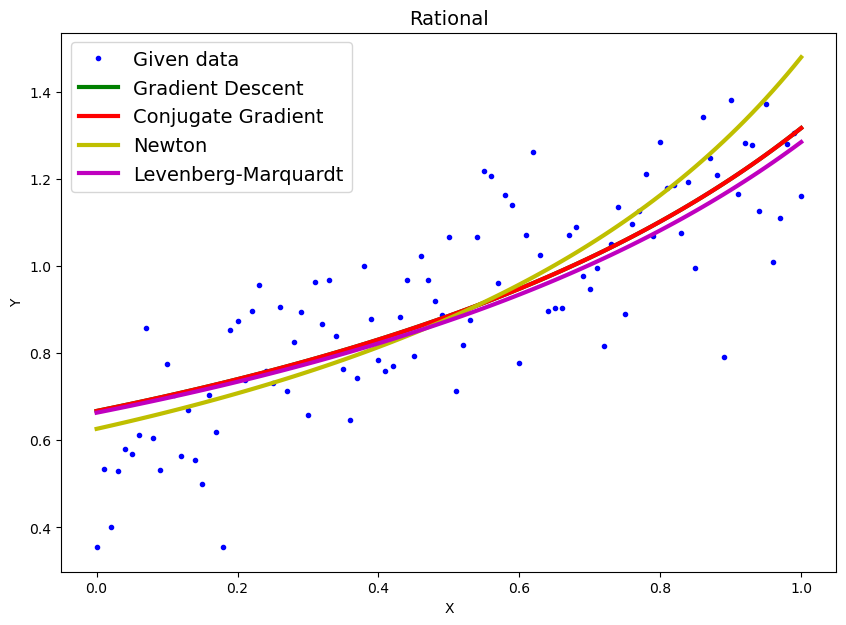

In [51]:
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(xk, GD_rat[0] / (1 + GD_rat[1]*xk), 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_rat[0] /(1 + CGD_rat[1]*xk), 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_rat[0] / (1 + Newton_rat[1]*xk), 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_rat[0] / (1 + lma_rat[1]*xk), 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

Compare results with methods from Task 2 for the same dataset

In [52]:
### The methods from Task 2 have been implemented here, ###
### but already have been cleared to save place ###

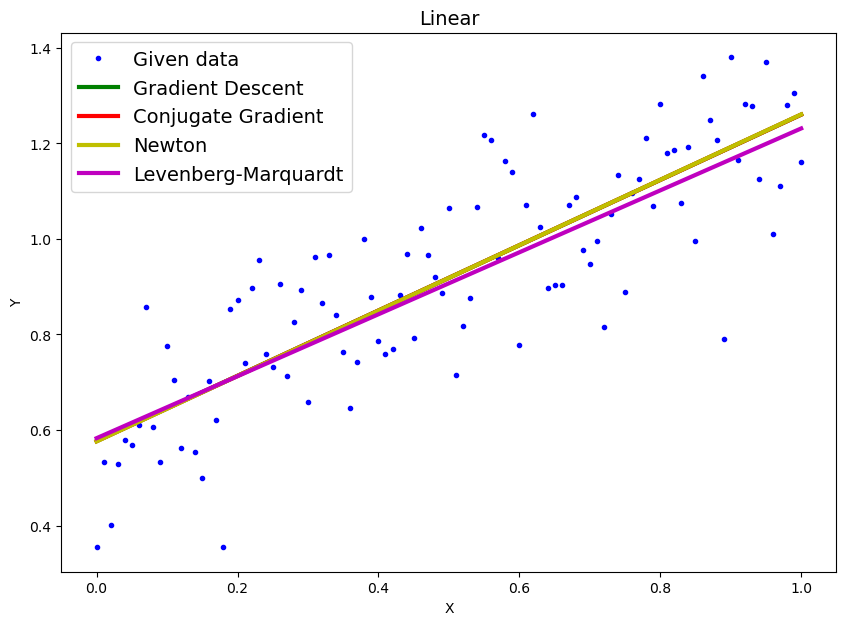

In [53]:
# Comparison for the linear approximation
plt.figure(figsize=(10,7))
plt.title("Linear", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
# plt.plot(xk, exh_lin[0]*xk + exh_lin[1], 'g', label="Exhaustive", linewidth=3)
# plt.plot(xk, gs_lin[0]*xk + gs_lin[1], 'r', label="Gauss", linewidth=3)
# plt.plot(xk, nm_lin[0]*xk + nm_lin[1], 'y', label="Nelder-Mead", linewidth=3)
plt.plot(xk, GD_linear[0]*xk + GD_linear[1], 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_linear[0]*xk + CGD_linear[1], 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_linear[0]*xk + Newton_linear[1], 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_linear[0]*xk + lma_linear[1], 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

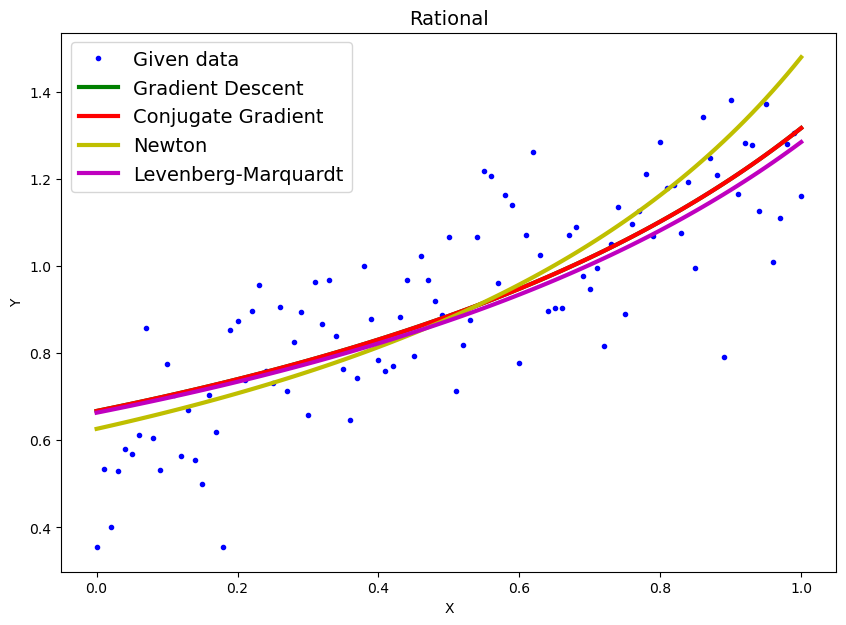

In [54]:
# Comparison for the rational approximation
plt.figure(figsize=(10,7))
plt.title("Rational", fontsize=14)
plt.plot(xk, yk, '.b', label="Given data")
plt.xlabel("X")
plt.ylabel("Y")
# plt.plot(xk, exh_rat[0] / (1 + exh_rat[1]*xk), 'g', label="Exhaustive", linewidth=3)
# plt.plot(xk, gs_rat[0] / (1 + gs_rat[1]*xk), 'r', label="Gauss", linewidth=3)
# plt.plot(xk, nm_rat[0] / (1 + nm_rat[1]*xk), 'y', label="Nelder-Mead", linewidth=3)
plt.plot(xk, GD_rat[0] / (1 + GD_rat[1]*xk), 'g', label="Gradient Descent", linewidth=3)
plt.plot(xk, CGD_rat[0] /(1 + CGD_rat[1]*xk), 'r', label="Conjugate Gradient", linewidth=3)
plt.plot(xk, Newton_rat[0] / (1 + Newton_rat[1]*xk), 'y', label="Newton", linewidth=3)
plt.plot(xk, lma_rat[0] / (1 + lma_rat[1]*xk), 'm', label="Levenberg-Marquardt", linewidth=3)
plt.legend(fontsize=14)

In [57]:
#Result analysis

# Linear approximation
print('Linear approximation')
print('Gradient Descent')
print(f'Number of iterations: {num_epochs}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {num_epochs}')
print('Conjugate Gradient')
print(f'Number of iterations: {CGD.nit}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {CGD.nfev}')
print('Newton')
print(f'Number of iterations: {newton.nit}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {newton.nfev}')
print('Levenberg-Marquardt')
print(f'Number of iterations: {num_epochs}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {lma.nfev}')

# Rational approximation
print('Rational approximation')
print('Gradient Descent')
print(f'Number of iterations: {num_epochs}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {num_epochs}')
print('Conjugate Gradient')
print(f'Number of iterations: {CGD.nit}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {CGD.nfev}')
print('Newton')
print(f'Number of iterations: {newton.nit}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {newton.nfev}')
print('Levenberg-Marquardt')
print(f'Number of iterations: {num_epochs}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {lma.nfev}')



Linear approximation
Gradient Descent
Number of iterations: 5000
Precision: 0.001
Number of function evaluations: 5000
Conjugate Gradient
Number of iterations: 13
Precision: 0.001
Number of function evaluations: 88
Newton
Number of iterations: 5
Precision: 0.001
Number of function evaluations: 31
Levenberg-Marquardt
Number of iterations: 5000
Precision: 0.001
Number of function evaluations: 28
Rational approximation
Gradient Descent
Number of iterations: 5000
Precision: 0.001
Number of function evaluations: 5000
Conjugate Gradient
Number of iterations: 13
Precision: 0.001
Number of function evaluations: 88
Newton
Number of iterations: 5
Precision: 0.001
Number of function evaluations: 31
Levenberg-Marquardt
Number of iterations: 5000
Precision: 0.001
Number of function evaluations: 28


In [70]:
# give results for parameters, loss, number of iterations, number of function evaluations for both linear and rational approximations for each method in tabular form
print('Linear approximation')
print('Gradient Descent')
print('Parameters: ', GD_linear)
print(f'Number of iterations: {num_epochs}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {num_epochs}')
print('Conjugate Gradient')
print('Parameters: ', CGD_linear)
print(f'Number of iterations: {CGD.nit}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {CGD.nfev}')
print('Newton')
print('Parameters: ', Newton_linear)
print(f'Number of iterations: {newton.nit}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {newton.nfev}')
print('Levenberg-Marquardt')
print('Parameters: ', lma_linear)
print(f'Number of iterations: {num_epochs}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {lma.nfev}')

print('Rational approximation')
print('Gradient Descent')
print('Parameters: ', GD_rat)
print(f'Number of iterations: {num_epochs}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {num_epochs}')
print('Conjugate Gradient')
print('Parameters: ', CGD_rat)
print(f'Number of iterations: {CGD.nit}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {CGD.nfev}')
print('Newton')
print('Parameters: ', Newton_rat)
print(f'Number of iterations: {newton.nit}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {newton.nfev}')
print('Levenberg-Marquardt')
print('Parameters: ', lma_rat)
print(f'Number of iterations: {num_epochs}')
print(f'Precision: {eps}')
print(f'Number of function evaluations: {lma.nfev}')



Linear approximation
Gradient Descent
Parameters:  [0.6834573331665105, 0.5767889559498138]
Number of iterations: 5000
Precision: 0.001
Number of function evaluations: 5000
Conjugate Gradient
Parameters:  [0.68381284 0.57659844]
Number of iterations: 13
Precision: 0.001
Number of function evaluations: 88
Newton
Parameters:  [0.68471677 0.57607094]
Number of iterations: 5
Precision: 0.001
Number of function evaluations: 31
Levenberg-Marquardt
Parameters:  [0.64851676 0.58288368]
Number of iterations: 5000
Precision: 0.001
Number of function evaluations: 28
Rational approximation
Gradient Descent
Parameters:  [0.6673087115992358, -0.493194530675115]
Number of iterations: 5000
Precision: 0.001
Number of function evaluations: 5000
Conjugate Gradient
Parameters:  [ 0.66730872 -0.49319452]
Number of iterations: 13
Precision: 0.001
Number of function evaluations: 88
Newton
Parameters:  [ 0.62626244 -0.5766609 ]
Number of iterations: 5
Precision: 0.001
Number of function evaluations: 31
Levenb

In [76]:
# tabulate the results
from tabulate import tabulate
print(tabulate([['Gradient Descent', num_epochs, GD_linear, eps, num_epochs], ['Conjugate Gradient', CGD.nit, CGD_linear, eps, CGD.nfev], ['Newton', newton.nit, Newton_linear, eps, newton.nfev], ['Levenberg-Marquardt', num_epochs, lma_linear, eps, lma.nfev]], headers=['Linear','Method', 'Number of iterations', 'Precision', 'Number of function evaluations']))
print()
print(tabulate([['Gradient Descent', num_epochs, GD_rat, eps, num_epochs], ['Conjugate Gradient', CGD.nit, CGD_rat, eps, CGD.nfev], ['Newton', newton.nit, Newton_rat, eps, newton.nfev], ['Levenberg-Marquardt', num_epochs, lma_rat, eps, lma.nfev]], headers=['Rational','Method', 'Number of iterations', 'Precision', 'Number of function evaluations']))


Linear                 Method  Number of iterations                        Precision    Number of function evaluations
-------------------  --------  ----------------------------------------  -----------  --------------------------------
Gradient Descent         5000  [0.6834573331665105, 0.5767889559498138]        0.001                              5000
Conjugate Gradient         13  [0.68381284 0.57659844]                         0.001                                88
Newton                      5  [0.68471677 0.57607094]                         0.001                                31
Levenberg-Marquardt      5000  [0.64851676 0.58288368]                         0.001                                28

Rational               Method  Number of iterations                        Precision    Number of function evaluations
-------------------  --------  ----------------------------------------  -----------  --------------------------------
Gradient Descent         5000  [0.6673087115992